In [1]:
import numpy as np 
import pandas as pd 
import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')

import pandas_datareader.data as web
import cufflinks as cf 
from plotly.offline import iplot
import plotly.graph_objects as go
cf.go_offline()

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [3]:
# Bank of America 
BAC = web.DataReader('BAC', 'stooq', start, end)
# CitiGroup
C = web.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = web.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = web.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = web.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = web.DataReader("WFC", 'stooq', start, end)

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [5]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [6]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [7]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   40.601  40.823  39.934  40.739  18832700.0  421.80  425.04   
2006-01-04   40.671  40.881  40.194  40.306  20521415.0  420.61  422.66   
2006-01-05   40.306  40.524  40.083  40.359  17129894.0  416.96  419.89   
2006-01-06   40.496  40.591  40.109  40.297  14554711.0  420.77  420.91   
2006-01-09   40.428  40.645  40.116  40.324  18050003.0  418.34  419.54   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   414.12  424.29  1786289.0  ...  38.813  39.706  38.516  39.582   
2006-01-04   416.17  416.44  2173546.0  ...  39.852  40.246  39.614  39.614   
2006-01-05   416.62  418.49  1318875.0  ...  39.614  39.778  39.384  39.722   
2006-01-06   414.90  418.49  1591822.0  ...  39.899  39.950  39.410  39.762   
2006-01-09   415.75  416.53  1952580.0  ...  39.800  40.253  39.793  40.178   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6575019.0  23.277  23.555  22.983  23.497  14956046.0  
2006-01-04   9755289.0  23.421  23.436  23.098  23.225  14757294.0  
2006-01-05   7065367.0  23.202  23.239  23.060  23.202  13754283.0  
2006-01-06   8424875.0  23.264  23.402  23.122  23.333  11409137.0  
2006-01-09   5067910.0  23.333  23.436  23.239  23.333   7629265.0  

[5 rows x 30 columns]

In [8]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 47.505
C 485.57
GS 210.17
JPM 58.967
MS 60.624
WFC 48.198


In [10]:
# Max close Price
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     47.505
C      485.570
GS     210.170
JPM     58.967
MS      60.624
WFC     48.198
dtype: float64

In [11]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010629,-0.018501,-0.013638,-0.014285,0.000808,-0.011576
2006-01-05,0.001315,0.004923,-0.000371,0.003088,0.002726,-0.000990
2006-01-06,-0.001536,0.000000,0.013925,0.007071,0.001007,0.005646
2006-01-09,0.000670,-0.004684,0.011994,0.016227,0.010462,0.000000


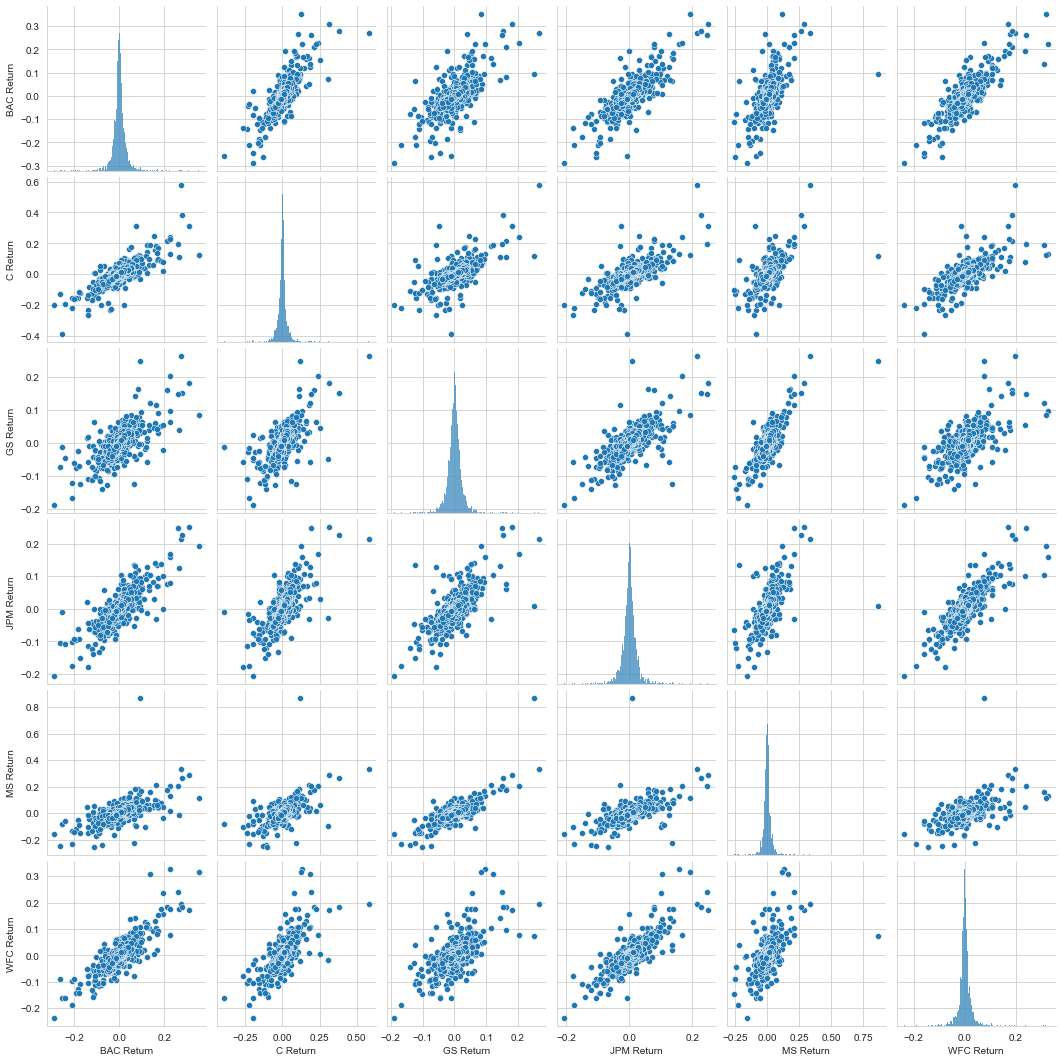

In [14]:
sns.pairplot(returns[1:])

In [15]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014027
JPM Return    0.013965
MS Return     0.016007
WFC Return    0.012546
dtype: float64

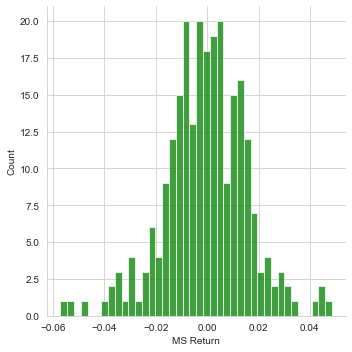

In [18]:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green',
           bins=40)

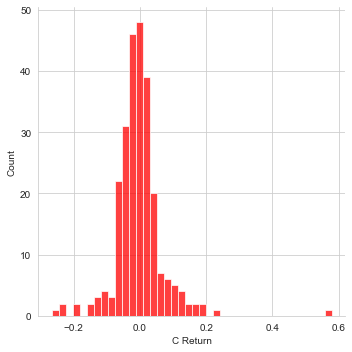

In [19]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red',
           bins=40)

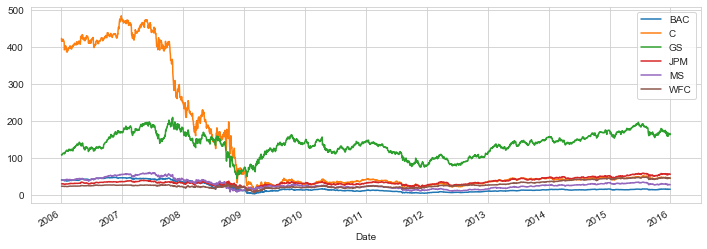

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

In [21]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,40.739,424.290,109.25,29.892,39.582,23.497
2006-01-04,40.306,416.440,107.76,29.465,39.614,23.225
2006-01-05,40.359,418.490,107.72,29.556,39.722,23.202
2006-01-06,40.297,418.490,109.22,29.765,39.762,23.333
2006-01-09,40.324,416.530,110.53,30.248,40.178,23.333
...,...,...,...,...,...,...
2015-12-24,15.430,45.674,165.45,56.443,28.034,45.756
2015-12-28,15.304,45.389,164.67,56.257,27.765,45.642
2015-12-29,15.437,45.911,166.39,56.838,28.093,46.148


<AxesSubplot:xlabel='Date'>

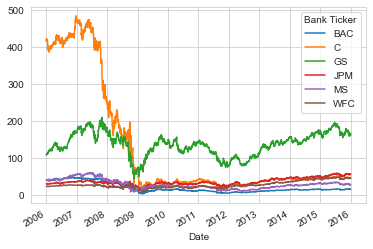

In [22]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot()

In [23]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

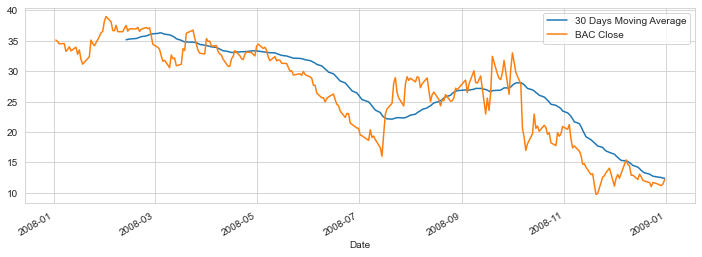

In [24]:
plt.figure(figsize=(12,4))
BAC['Close'].sort_index().loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label="30 Days Moving Average")
BAC['Close'].sort_index().loc['2008-01-01': '2009-01-01'].plot(label='BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

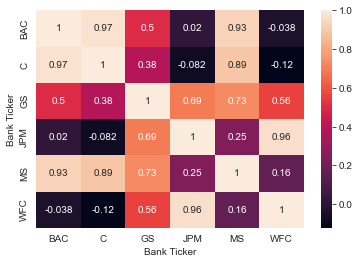

In [25]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

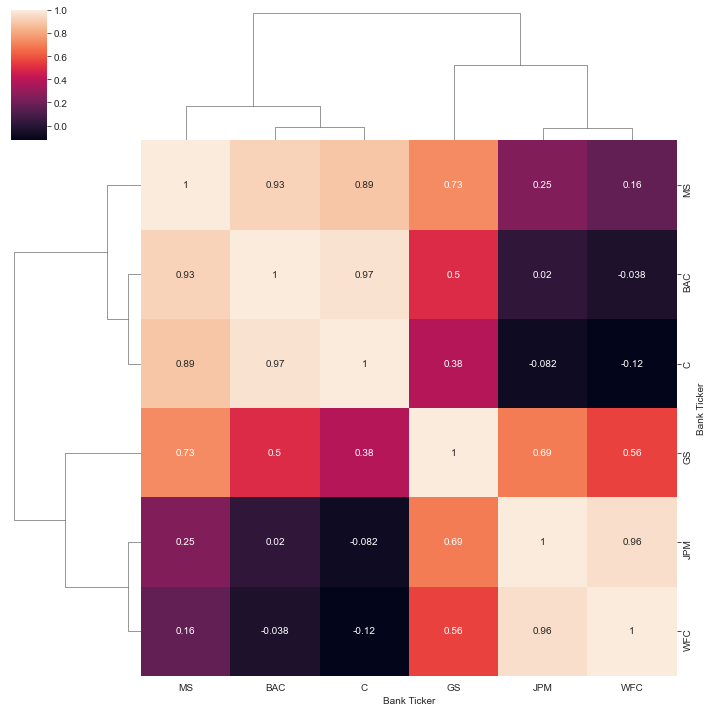

In [26]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

In [27]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [28]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')